---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

Evaluation for classification (my own notes)

1) Dummy classifiers

2) Binary (two-class) confusion matrix

3) Evaluation metrics for binary classification
-> Accuracy score
-> Precision score
-> Recall score
-> F1 score

4) Raw scores/output (use as inputs to performance evaluation metrics)
-> Decision score
-> Probability score (predict_proba)
 
5) Precision-recall curves
-> Can either use Decision function score or Probability score as input

6) ROC curves/Area Under Curve
-> Can either use Decision function score or Probability score as input

6) Multi-class confusion matrix (with heatmap)
-> Micro-avg (treat instances equally)
-> Macro-avg (treat class equally)

7) Regression evaluation metrics
-> mean square error
-> R2 score

8) Model selection using evaluation metrics
-> Cross-validation
-> Grid Search

# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

### Preamble

In [1]:
#%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits() #digits dataset which has images of handwritten digits labeled with ten classes, representing the digits zero through nine.
X, y = dataset.data, dataset.target 

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

#from the results we can see that: There are roughly the same number of instances in each class. So this dataset has balanced classes.

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [5]:
from sklearn.dummy import DummyClassifier

# Dummy classifiers, again, are called that because they don't even look at the data to make a prediction. They simply use the strategy or rule of thumb that you instruct them to use, when creating them. 
# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [7]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices

#### Binary (two-class) confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[357  50]
 [ 40   3]]


In [10]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [13]:
# In general,Recall is used when the objective is to minimize false negatives.
# medical tumor detecting classifier, that we wanted an evaluation metric that would give higher scores to classifiers that not only achieved a high number of true positives, but also avoided false negatives. 
# That is, that rarely failed to detect a true cancerous tumor.

# In general, Precision is used as a metric when our objective is to minimize false positives. 
# One possible scenario that illustrates when it could be important to avoid too many false positives is one where law enforcement is using a video recognition algorithm for finding likely criminals in a given area. 
# In this case, a false positive would mean arresting an innocent person. That may be considered a lot more damaging than a false negative, which would be letting a potential criminal lock-free. 
# So this is a precision-oriented task that should minimize false positives.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [15]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [16]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.88      0.89       407
           1       0.06      0.07      0.06        43

    accuracy                           0.80       450
   macro avg       0.48      0.47      0.48       450
weighted avg       0.82      0.80      0.81       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

### Decision functions

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test) #this will return (450,) shape
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# A decision function in the context of machine learning models, particularly in classification tasks, refers to the function that a model uses to decide how to classify a sample. 
# It computes the raw output of the model before applying a final decision rule (such as a threshold) to assign a class label.

# show the decision_function scores for first 20 instances
y_score_list

[(0, -29.82878765657328),
 (0, -19.382918863780674),
 (0, -29.198350094144818),
 (0, -21.74618957364091),
 (0, -22.642395179198683),
 (0, -11.806001793733234),
 (1, 6.496015338387766),
 (0, -23.35457044336217),
 (0, -27.543489533171194),
 (0, -26.888218605969847),
 (0, -31.862729156977068),
 (0, -22.486124452344864),
 (0, -25.318003046303573),
 (0, -13.384557921955727),
 (0, -13.565613169252998),
 (0, -13.308397336745994),
 (1, 12.180800746380003),
 (0, -34.362485068735225),
 (0, -13.231508782840177),
 (0, -29.59394116341664)]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test) #this will return (450,2) shape
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 1.1105090928077371e-13),
 (0, 3.820368826300899e-09),
 (0, 2.0860161836658648e-13),
 (0, 3.595421951097963e-10),
 (0, 1.4673466217972994e-10),
 (0, 7.459596353238993e-06),
 (1, 0.9984928331399855),
 (0, 7.198448952133965e-11),
 (0, 1.0914767357423115e-12),
 (0, 2.1018176331402847e-12),
 (0, 1.4527555683527247e-14),
 (0, 1.7155375597528779e-10),
 (0, 1.0104875898824639e-11),
 (0, 1.5387203005197823e-06),
 (0, 1.2838920195637162e-06),
 (0, 1.6604880426068634e-06),
 (1, 0.9999948720565922),
 (0, 1.192785497676352e-15),
 (0, 1.7931968594397596e-06),
 (0, 1.404477075858943e-13)]

### Precision-recall curves

ROC Curve: This curve takes into account both positive and negative classes by focusing on the True Positive Rate (recall) and the False Positive Rate. 
The ROC curve is suitable when the classes are balanced.

Precision-Recall Curve: This curve focuses more on the positive class, specifically how well the model identifies the positive class (precision) and how well it recalls true positives (recall). 
It is more informative when the data is imbalanced, i.e., when one class is much less frequent than the other.

In [19]:
# Key Differences Between Probabilities and Decision Scores for Precision-Recall Curve:
# Feature: 1 -> Probabilities (predict_proba).                                                     2 -> Decision Function Scores (decision_function)
# Output:  1 ->  Probability values between 0 and 1.                                               2 -> Raw decision scores (could be any real number)
# Precision-Recall Curve Use: 1 -> Varying the threshold of probability values to plot the curve.  2 -> Varying the threshold of the decision function scores
# Model Types: 1 -> Logistic regression, random forests, gradient boosting, etc.                   2 -> SVMs, linear classifiers, etc.
# Interpretability: 1 -> More interpretable as the probability of belonging to a class.            2 -> Less interpretable since it's often not normalized (no direct probability)
# Use Case: 1 -> Ideal when you want to vary thresholds and explore model uncertainty.             2 -> Used when probabilities aren't available (e.g., in SVM)

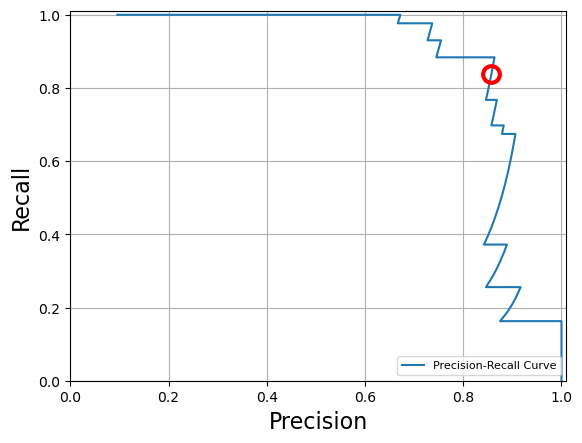

In [20]:
from sklearn.metrics import precision_recall_curve

# The precision-recall curve is a graphical representation of the tradeoff between precision and recall for different thresholds in a binary classification problem.
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr) 
# Computes precision, recall, and the corresponding thresholds for different probability thresholds (y_scores_lr) based on the true binary labels (y_test).

closest_zero = np.argmin(np.abs(thresholds))
# Find the index of the threshold closest to zero (the point where decision boundary is closest to zero). This is useful for finding the performance at the threshold where the model is most balanced or on the edge.
closest_zero_p = precision[closest_zero] # Extract the precision and recall values at this threshold.
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01]) # This sets the range for the x-axis (Precision) from 0.0 to 1.01 allowing a bit of space beyond the 1.0 point to make the graph less "tight" and easier to read.
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3) 
# Adds a red circle marker to the plot at the point corresponding to the threshold closest to zero.
# Mew stands for marker edge width, it controls the marker edge width when plotting the red circle ('o').

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

plt.legend(loc='lower right', fontsize=8)
plt.grid(True)

#plt.axes().set_aspect('equal') cannot use this codeline due to some bug
plt.show()

### ROC curves, Area-Under-Curve (AUC)

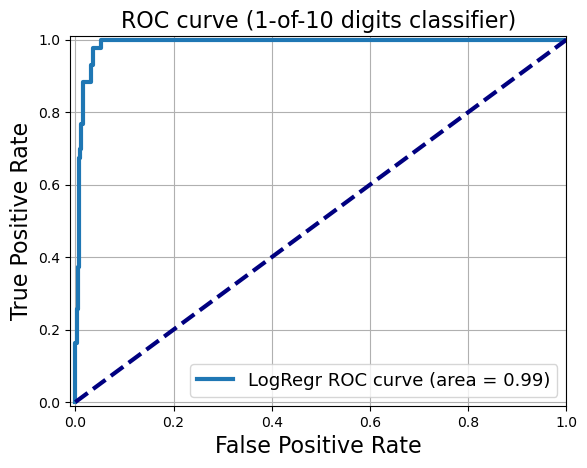

In [21]:
# ROC curves or receiver operating characteristic curves are very widely used visualization method that illustrate the performance of a binary classifier.
# An AUC (under ROC curves) of zero represents a very bad classifier, and an AUC of one will represent an optimal classifier.
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
#plt.axes().set_aspect('equal') cannot use this codeline due to some bug
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


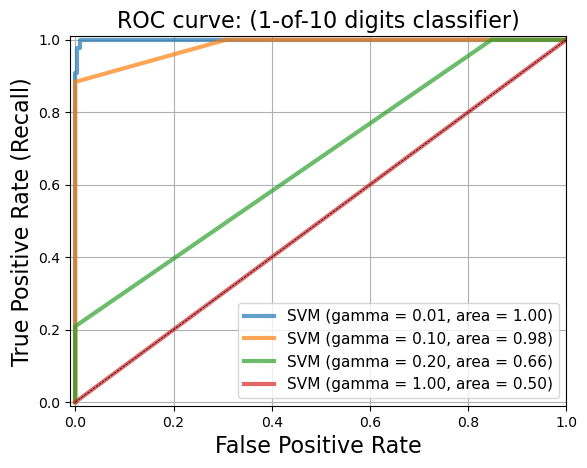

In [22]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
#plt.axes().set_aspect('equal') cannot use this codeline due to some bug
plt.grid(True)
plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

In [23]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

# Without heatmap style.
svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
print(confusion_mc)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]


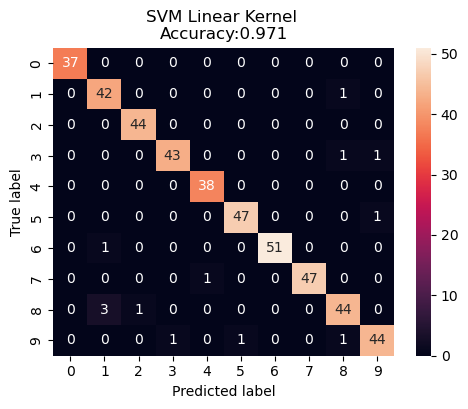

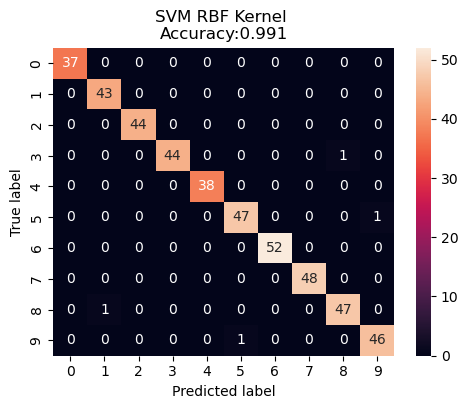

In [24]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

# useful to display a confusion matrix as a heat map in order to highlight the relative frequencies of different types of errors.
svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True) #This parameter tells Seaborn to annotate each cell of the heatmap with the numeric value, so you can see the exact count of predictions in each class category. Without this, the heatmap would show just the color intensity based on the values.
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [25]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

In [26]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [27]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


### Regression evaluation metrics

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


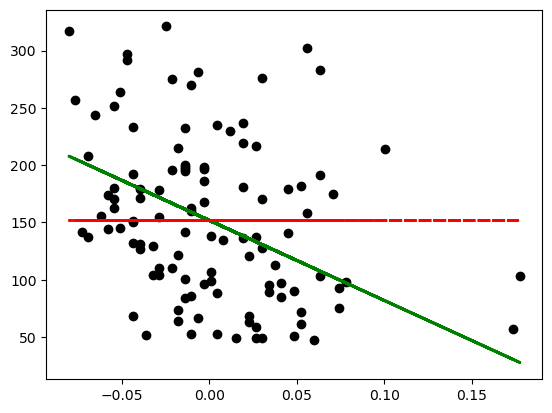

In [28]:
#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6] # The expression [:, None, 6] reshapes the data:None is used to add a new axis to the array, turning the shape from (n_samples, ) to (n_samples, 1), effectively converting the column data into a 2D column vector. 6 specifies that we are interested in the feature in the 7th column (since indexing starts at 0).

y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', linewidth=2, label = 'dummy')

plt.show()

### Model selection using evaluation metrics

#### Cross-validation example

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: ACCURACY
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


#### Evaluation metrics supported for model selection

In [31]:
from sklearn.metrics import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

Grid best parameter (max. precision): {'class_weight': {1: 3}}
Grid best score (precision): 0.5277248699884962
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5474867794277984
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8940391684261921


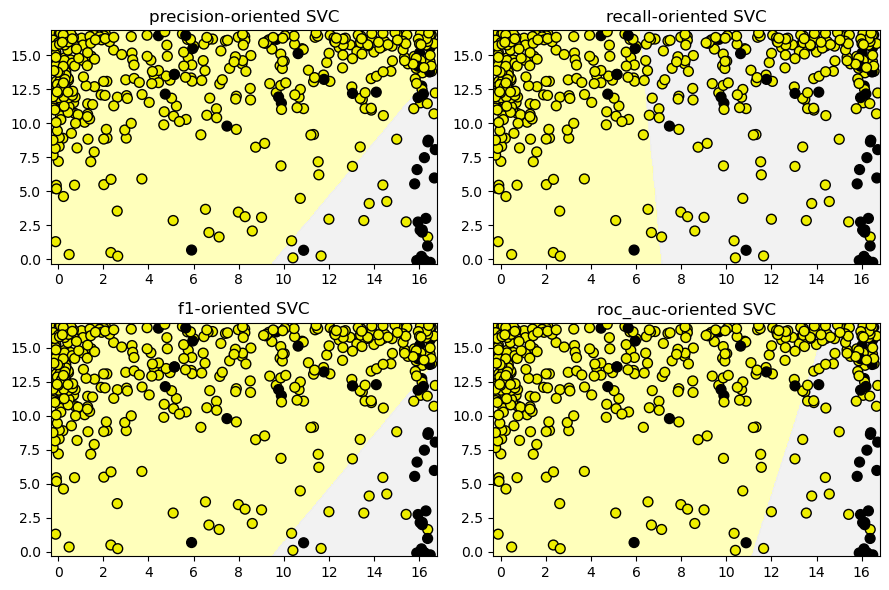

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
# The function plot_class_regions_for_classifier_subplot is typically used for visualizing the decision boundaries of a classifier in a 2D feature space.
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta 
# This selects the 20th and 59th features (columns) from the X_train dataset.
# X_train.shape gives you the shape of the dataset, where X_train.shape[0] is the number of rows (data points) 
# The shape of X_train[:, [20, 59]] is (n_samples, 2), where n_samples is the number of rows in X_train.
# The variable jitter_delta is set to 0.25, so it controls the scale of the added noise (in this case, jittering points within a range of [-0.25, 0.75]).

X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta
# X_twovar_train and X_twovar_test now contain two selected features from the training and test datasets, respectively, with added random noise.

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
# The string 'balanced' tells the model to automatically adjust the class weights inversely proportional to class frequencies in the input data.
# These are custom weight assignments for class 1. The dictionary format {1: X} assigns a specific weight to class 1.
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'.format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'.format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3) # horizontal and vertical space between subplots
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None, None, None,  plt.subplot(2, 2, i+1))
    plt.title(eval_metric+'-oriented SVC')
    
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

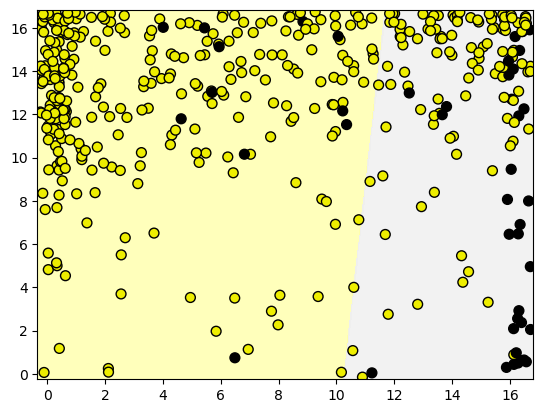

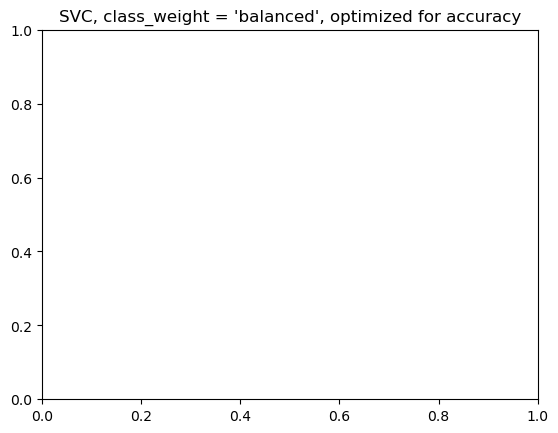

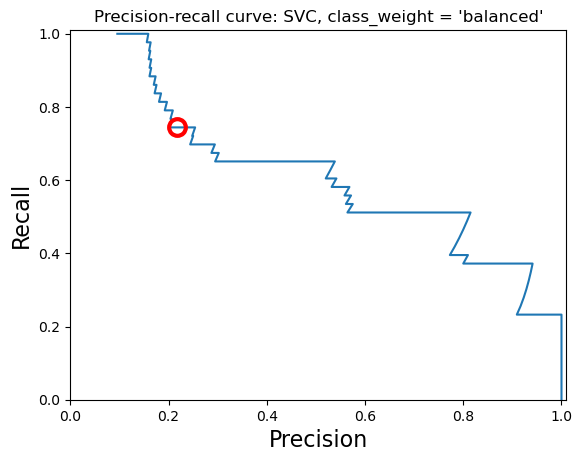

At zero threshold, precision: 0.22, recall: 0.74


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores) #the thresholds has shape (450,)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

# If you're going to create multiple plots and you want to separate them into different figures, you need to call plt.figure() to initialize a new figure. Without calling it, matplotlib will continue to add plots to the same figure by default.
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'.format(closest_zero_p, closest_zero_r))